# STEP35 高階微分の計算グラフ

## これまでの流れ

- STEP27:テイラー展開の微分
- STEP28:ローゼンブロック関数を勾配降下法を理解する
- STEP29:ニュートン法を用いた最適化, 勾配法は遅いのでニュートン法による収束高速化を目指す
- STEP30:Back propagation の実装を見直して2階微分, 3階微分など高階微分に対応できるようにする(準備)
- STEP31:Back propagation の実装を見直して2階微分, 3階微分など高階微分に対応できるようにする(理論)
- STEP32:Back propagation の実装を見直して2階微分, 3階微分など高階微分に対応できるようにする(実装)
- STEP33:ニュートン法は2階微分を使うので、STEP30〜STEP32までの成果を使って自動に最適化計算を行ってみる
- STEP34:STEP34:sin関数の高階微分, 新しい関数としてsin関数/cos関数を実装する
- STEP35:新しい関数としてtanhを追加する

## 事前準備

In [1]:
if '__file__' in globals():
    import os, sys
    sys.path.append(os.path.join(os.path.dirname(__file__), '..'))
import numpy as np
from dezero import Variable, Function
from dezero.utils import plot_dot_graph
import dezero.functions as F

## tanhの復習

### tanhの定義

$$y = tanh \left(x\right) = \frac{e^x-e^{-x}}{e^x+e^{-x}}$$

### tanhの特徴

- tanhは入力を-1から1の間に変換する関数である

<function matplotlib.pyplot.show(close=None, block=None)>

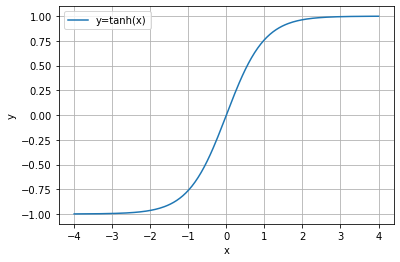

In [2]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-4,4,200)
y1 = (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

plt.plot(x, y1, label="y=tanh(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show

## 35.1 tanh関数の微分

tanhの微分を求めるには以下の微分の公式を利用する

$$
\left\{\frac{f\left(x\right)}{g\left(x\right)}\right\}^\prime = \frac{f^\prime\left(x\right)g\left(x\right)-f\left(x\right)g^\prime\left(x\right)}{g\left(x\right)^2}
$$

微分してみる

$$
\begin{align}
 & y^\prime = \frac{\partial tanh \left(x\right)}{\partial x} \\
 & = \frac{\left(e^x+e^{-x}\right)\left(e^x+e^{-x}\right)-\left(e^x-e^{-x}\right)\left(e^x-e^{-x}\right)}{\left(e^x+e^{-x}\right)^2} \\
& = \frac{\left(e^x+e^{-x}\right)^2-\left(e^x-e^{-x}\right)^2}{\left(e^x+e^{-x}\right)^2} \\
& =1- \frac{\left(e^x-e^{-x}\right)^2}{\left(e^x+e^{-x}\right)^2} \\
& =1- tanh\left(x\right)^2 \\
& = 1-y^2
\end{align}
$$

## 35.2 tanhの実装

### `dezero/functions.py` に以下を実装

```python
class Tanh(Function):
    def forward(self, x):
        y = np.tanh(x)
        return y
    
    def backward(self, gy):
        y = self.outputs[0]()
        gx = gy * (1 - y * y)
        return gx

def tanh(x):
    return Tanh()(x)
```

## 35.3 高階微分の計算グラフの可視化

tanh関数の高階微分を求め、その計算グラフを可視化します

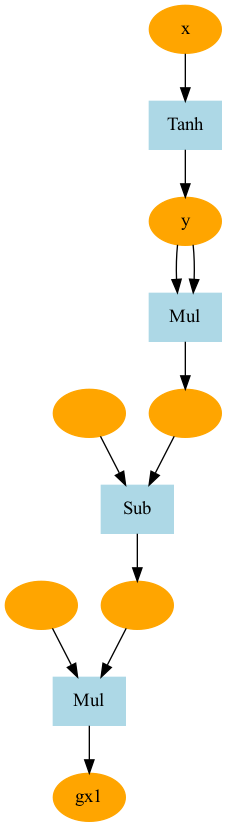

In [5]:
x = Variable(np.array(1.0))
y = F.tanh(x)
x.name = 'x'
y.name = 'y'
y.backward(create_graph=True)

iters = 0

for i in range(iters):
    gx = x.grad
    x.cleargrad()
    gx.backward(create_graph=True)

gx = x.grad
gx.name = 'gx' + str(iters + 1)
plot_dot_graph(gx, verbose=False, to_file='tanh.png')

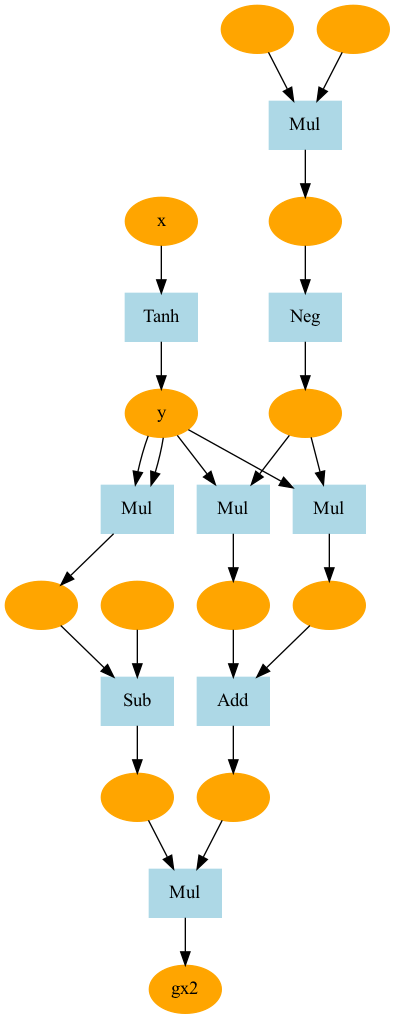

In [11]:
x = Variable(np.array(1.0))
y = F.tanh(x)
x.name = 'x'
y.name = 'y'
y.backward(create_graph=True)

iters = 1

for i in range(iters):
    gx = x.grad
    x.cleargrad()
    gx.backward(create_graph=True)

gx = x.grad
gx.name = 'gx' + str(iters + 1)
plot_dot_graph(gx, verbose=False, to_file='tanh.png')

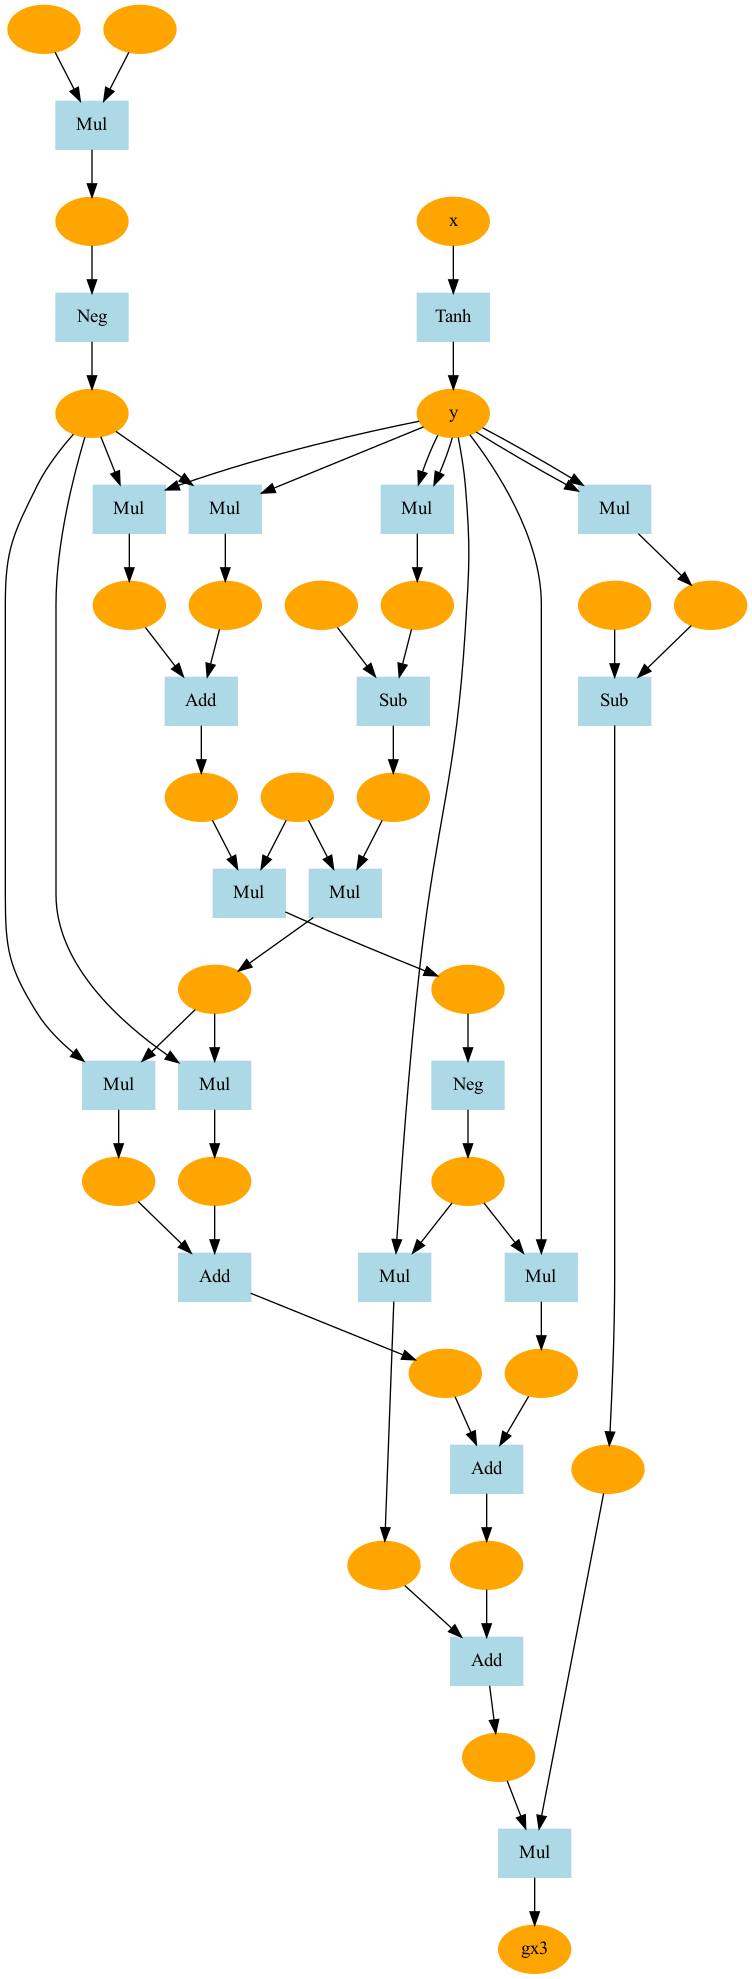

In [12]:
x = Variable(np.array(1.0))
y = F.tanh(x)
x.name = 'x'
y.name = 'y'
y.backward(create_graph=True)

iters = 2

for i in range(iters):
    gx = x.grad
    x.cleargrad()
    gx.backward(create_graph=True)

gx = x.grad
gx.name = 'gx' + str(iters + 1)
plot_dot_graph(gx, verbose=False, to_file='tanh.png')

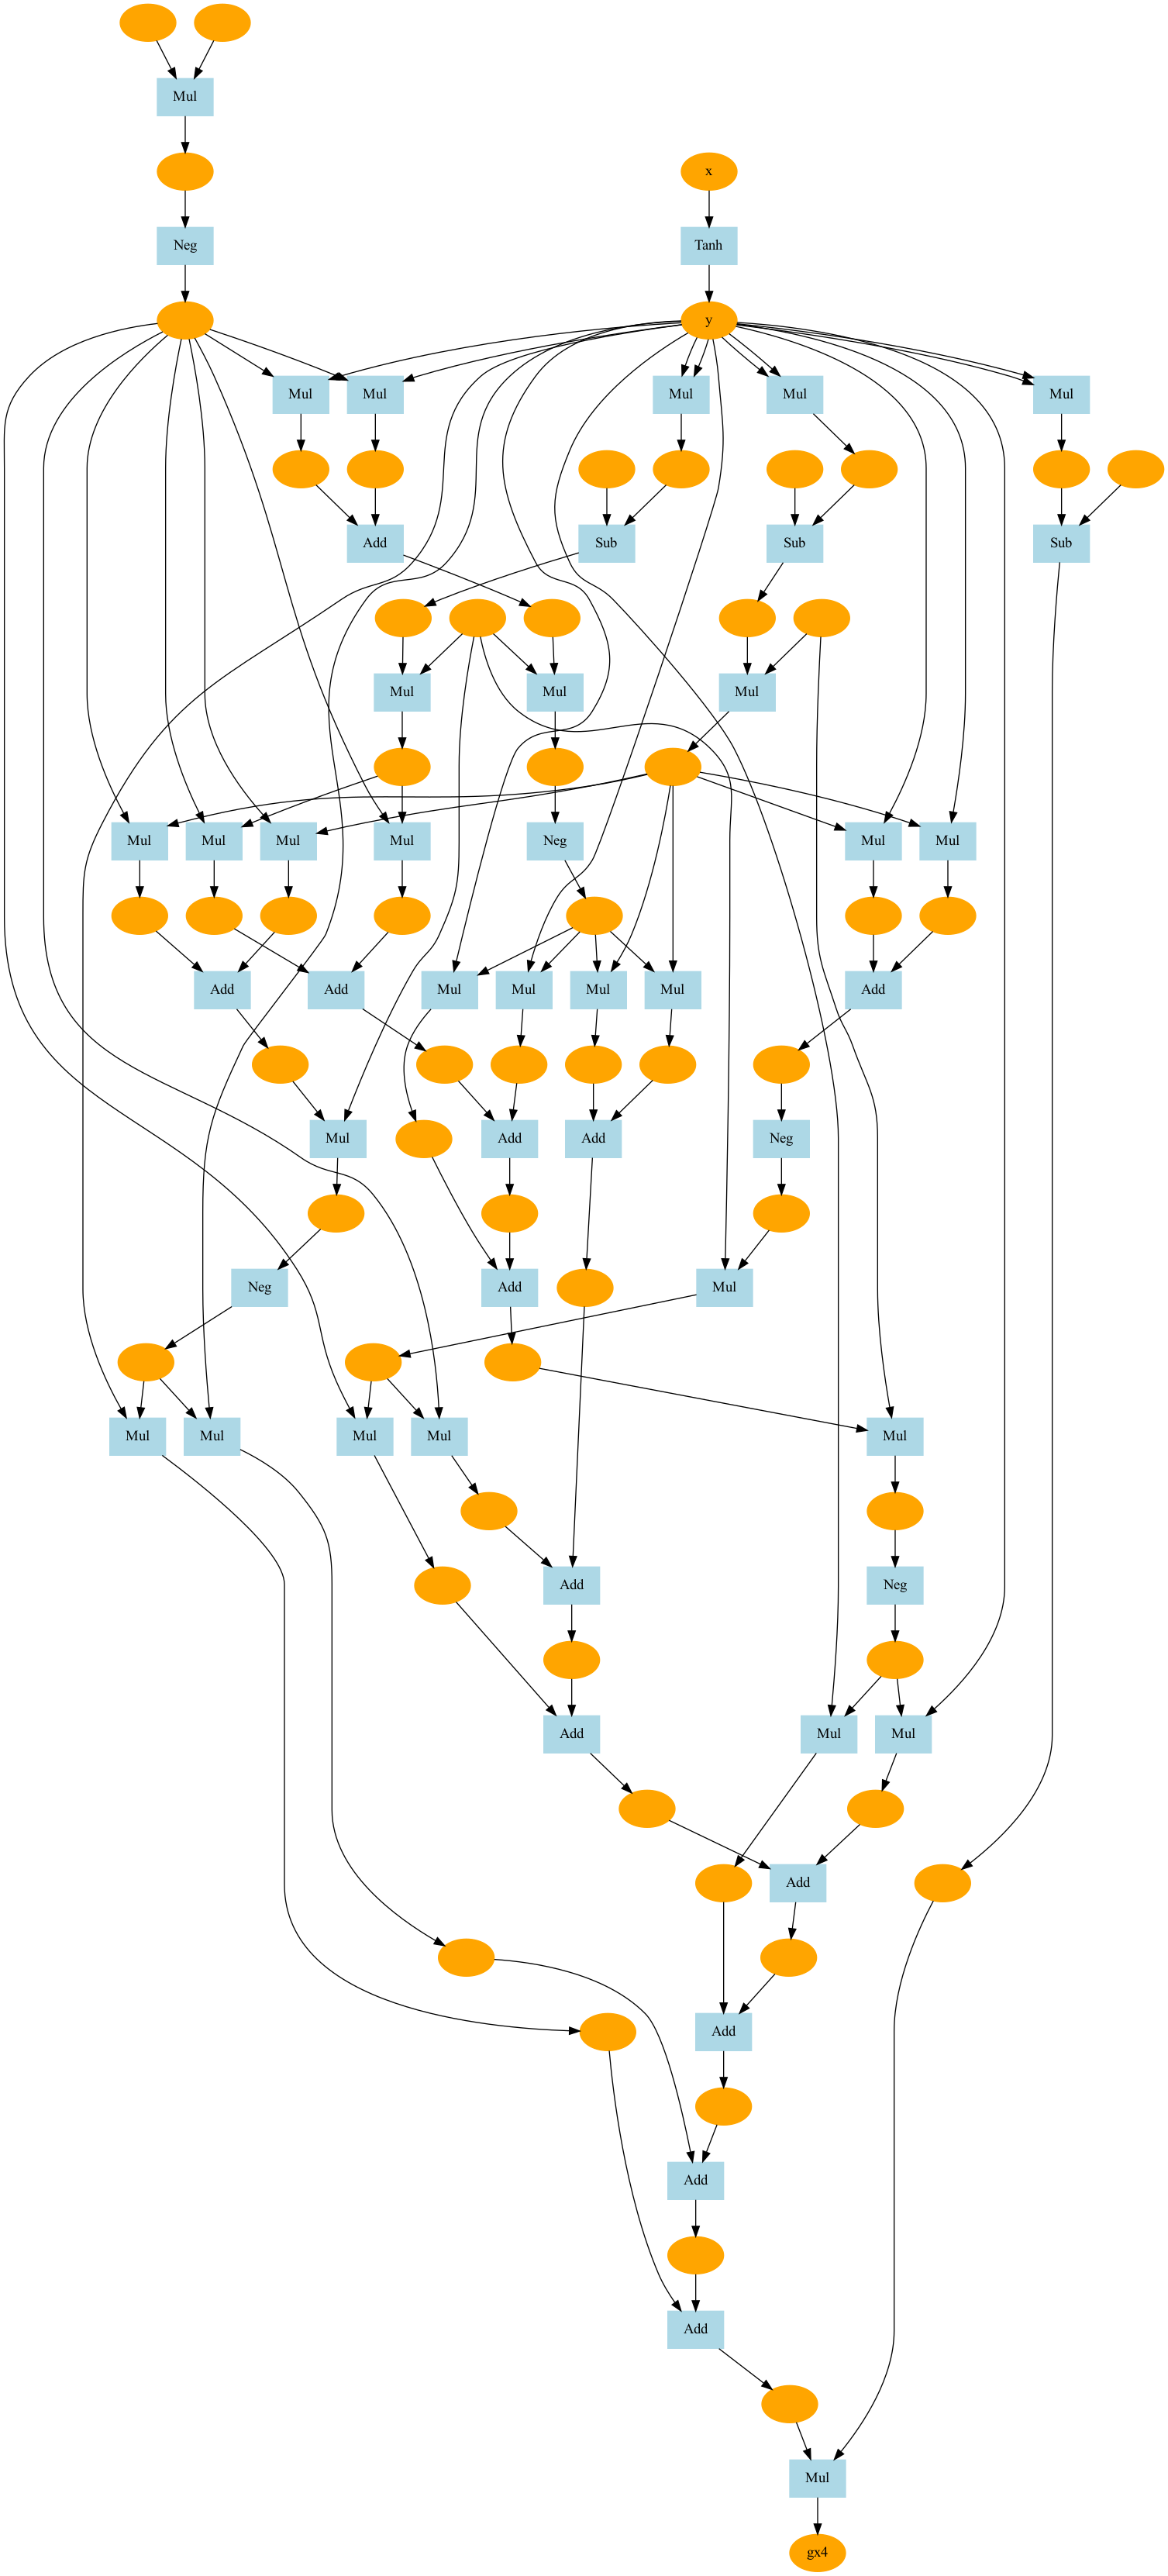

In [13]:
x = Variable(np.array(1.0))
y = F.tanh(x)
x.name = 'x'
y.name = 'y'
y.backward(create_graph=True)

iters = 3

for i in range(iters):
    gx = x.grad
    x.cleargrad()
    gx.backward(create_graph=True)

gx = x.grad
gx.name = 'gx' + str(iters + 1)
plot_dot_graph(gx, verbose=False, to_file='tanh.png')

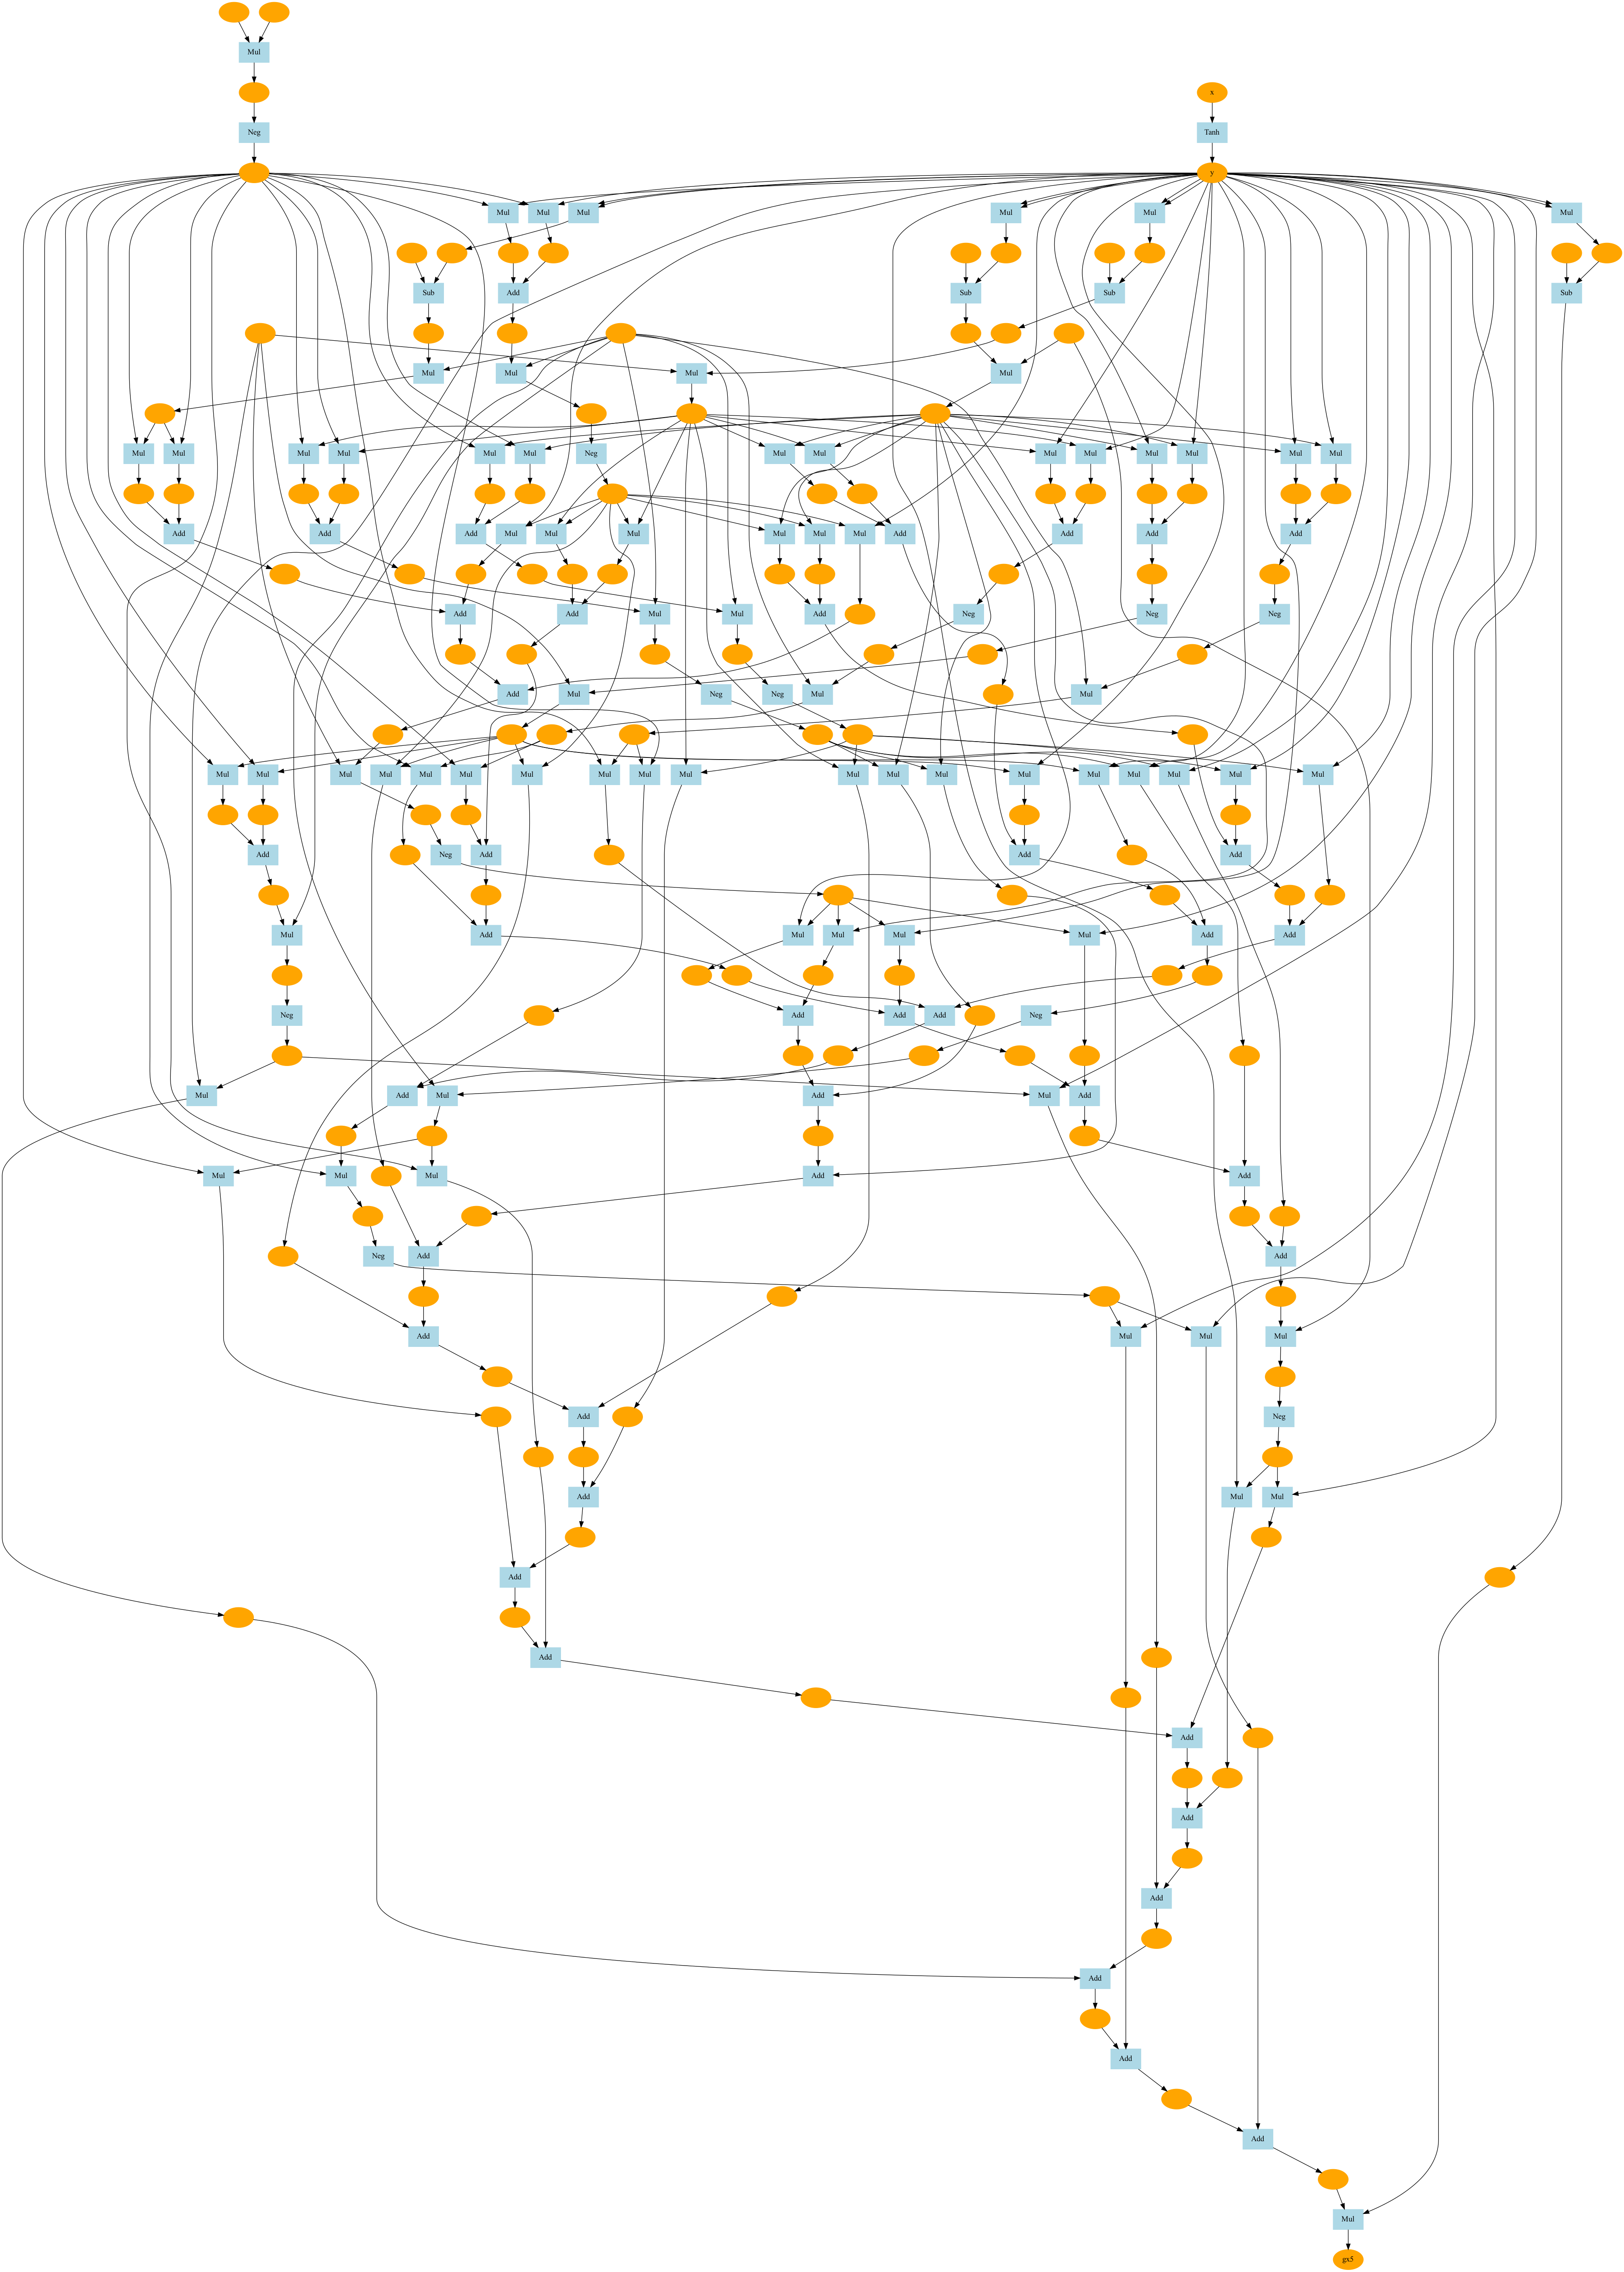

In [14]:
x = Variable(np.array(1.0))
y = F.tanh(x)
x.name = 'x'
y.name = 'y'
y.backward(create_graph=True)

iters = 4

for i in range(iters):
    gx = x.grad
    x.cleargrad()
    gx.backward(create_graph=True)

gx = x.grad
gx.name = 'gx' + str(iters + 1)
plot_dot_graph(gx, verbose=False, to_file='tanh.png')